# Лабораторная работа №3 - Численное интегрирование

Импорты библиотек


In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Вариант 19: $f(x) = x^2*\cosh(3*x)$

In [19]:
def func(x):
    return x

Отрезок:

In [15]:
a = 0
b = 1

In [16]:
def indefinite_integral(x):
    return x

value_integral = 0.5
print("Значение интеграла: ", round(value_integral, 6))

Значение интеграла:  0.5


Формула метода прямоугольников:

In [5]:
def rectangle_formula(f, h):
    return f * h

Формула метода трапеций:

In [6]:
def trapezoid_formula(f1, f2, h):
    return (f1 + f2) * h / 2

Формула метода Симпсона:

In [7]:
def simpson_formula(f1, f_prom, f2, h):
    return (f1 + 4 * f_prom + f2) * h / 6

Задание сетки:

In [20]:
h = 0.01

X = list(np.linspace(a, b, int((b - a) / h) + 1))
F = [func(x) for x in X]

h_min = 0.001
h_max = 0.5
h_step = 0.005

### Расчёт интегралов при помощи метода левых прямоугольников

In [21]:
left_rectangle_integral = 0
for f in F[0:len(F)-1]:
    left_rectangle_integral += rectangle_formula(f, h)
print("Значение интеграла: ", round(left_rectangle_integral, 6))
error_left_rectangle = abs(left_rectangle_integral - value_integral)
print("Погрешность: ", round(error_left_rectangle, 6))

Значение интеграла:  0.495
Погрешность:  0.005


### Расчёт интегралов при помощи метода правых прямугольников

In [573]:
right_rectangle_integral = 0
for f in F[1:len(F)]:
    right_rectangle_integral += rectangle_formula(f, h)
print("Значение интеграла: ", round(right_rectangle_integral, 6))
error_right_rectangle = abs(right_rectangle_integral - value_integral)
print("Погрешность: ", round(error_right_rectangle, 6))

Значение интеграла:  3.689033
Погрешность:  0.000836


### Расчёт интеграла при помощи метода средних прямоугольников

In [22]:
X_centres = []
for i in range(1, len(X)):
    X_centres.append((X[i - 1] + X[i]) / 2)
F_centres = [func(x) for x in X_centres]

centres_rectangle_integral = 0
for f in F_centres:
    centres_rectangle_integral += rectangle_formula(f, h)
print("Значение интеграла: ", round(centres_rectangle_integral, 6))
error_centres_rectangle = abs(centres_rectangle_integral - value_integral)
print("Погрешность: ", round(error_centres_rectangle, 6))

Значение интеграла:  0.5
Погрешность:  0.0


Зависимость погрешности от шага для метода центральных прямоугольников

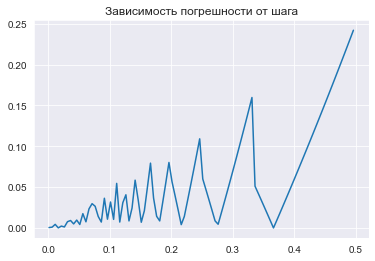

In [23]:
h_values = np.arange(h_min, h_max, h_step)
centre_errors = []
for h_ in h_values:
    x_values = list(np.arange(a, b + h_, h_))
    while x_values[-1] > b:
        x_values.pop(len(x_values) - 1)
    if b not in x_values:
        x_values.pop(len(x_values) - 1)
        x_values.append(b)
    F_values = [func(x) for x in x_values]
    value = 0
    for f in F_values:
        value += rectangle_formula(f, h_)
    centre_errors.append(abs(value - value_integral))

sns.lineplot(x=np.array(h_values), y=np.array(centre_errors))
plt.title("Зависимость погрешности от шага")
print()

In [576]:
# graphic = sns.lineplot(x=h_values, y=centre_errors)
# graphic.set_xscale('log')
# graphic.set_yscale('log')

### Расчёт интеграла методом трапеций

In [24]:
trapezoid_integral = 0
for i in range(len(F) - 1):
    trapezoid_integral += trapezoid_formula(F[i], F[i + 1], h)
print("Значение интеграла: ", round(trapezoid_integral, 6))
error_trapezoid = abs(trapezoid_integral - value_integral)
print("Погрешность: ", round(error_trapezoid, 6))

Значение интеграла:  0.5
Погрешность:  0.0


Зависимость погрешности от шага для метода трапеций

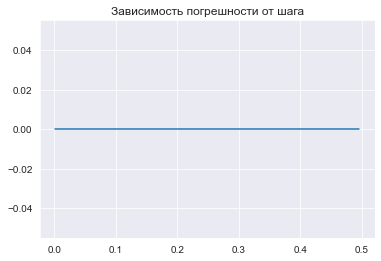

In [25]:
h_values = np.arange(h_min, h_max, h_step)
trapezoid_errors = []
for h_ in h_values:
    x_values = list(np.arange(a, b + h_, h_))
    while x_values[-1] > b:
        x_values.pop(len(x_values) - 1)
    if b not in x_values:
        x_values.pop(len(x_values) - 1)
        x_values.append(b)
    F_values = [func(x) for x in x_values]
    value = 0
    for i in range(len(F) - 1):
        value += trapezoid_formula(F[i], F[i + 1], h)
    trapezoid_errors.append(abs(value - value_integral))
sns.lineplot(x=np.array(h_values), y=np.array(trapezoid_errors))
plt.title("Зависимость погрешности от шага")
print()

### Расчёт интеграла методом Симпсона

In [26]:
X.extend(X_centres)
X.sort()
F_simp = [func(x) for x in X]

simpson_integral = 0
for i in range(1, len(F_simp) - 1, 2):
    simpson_integral += simpson_formula(F_simp[i - 1], F_simp[i], F_simp[i + 1], h)
print("Значение интеграла: ", round(simpson_integral, 6))
error_simpson = abs(simpson_integral - value_integral)
print("Погрешность: ", round(error_simpson, 9))

Значение интеграла:  0.5
Погрешность:  0.0


Зависимость погрешности от шага для метода Симпсона

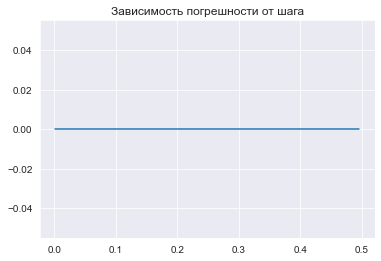

In [27]:
h_values = np.arange(h_min, h_max, h_step)
simpson_errors = []
for h_ in h_values:
    x_values = list(np.arange(a, b + h_, h_))
    while x_values[-1] > b:
        x_values.pop(len(x_values) - 1)
    if b not in x_values:
        x_values.pop(len(x_values) - 1)
        x_values.append(b)
    F_values = [func(x) for x in x_values]
    value = 0
    for i in range(1, len(F_simp) - 1, 2):
        value += simpson_formula(F_simp[i - 1], F_simp[i], F_simp[i + 1], h)
    simpson_errors.append(abs(value - value_integral))

sns.lineplot(x=np.array(h_values), y=np.array(simpson_errors))
plt.title("Зависимость погрешности от шага")
print()

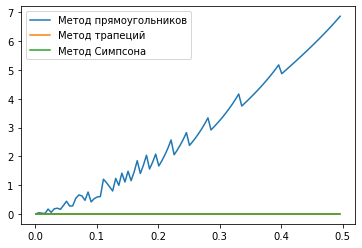

In [581]:
legend = ['Метод прямоугольников', 'Метод трапеций', 'Метод Симпсона']
for arr in [centre_errors, trapezoid_errors, simpson_errors]:
    sns.lineplot(x=h_values, y=arr)
plt.legend(legend)
print()